In [87]:
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [41]:
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf

In [132]:
main_df=pd.read_csv('titanic.csv')

In [133]:
titanic_df_trunc=pd.DataFrame()

In [134]:
titanic_df_trunc[['pclass','sex','age','sibsp','survived']]=main_df[['pclass','sex','age','sibsp','survived']]

In [135]:
titanic_df_trunc['sex'] = titanic_df_trunc['sex'].map({'male':'0','female':'1'}).astype('float32')
# titanic_df_trunc['survived']=titanic_df_trunc['survived'].apply(str)
titanic_df_trunc['pclass'] = titanic_df_trunc['pclass'].map({'1st':'1','2nd':'2','3rd':'3'}).astype('float32')
titanic_df_trunc['age'] = titanic_df_trunc['age'].fillna((titanic_df_trunc['age'].mean()))
# titanic_df_trunc['age']=titanic_df_trunc['age'].apply(str)
titanic_df_trunc['sibsp']=titanic_df_trunc['sibsp'].astype('float32')

In [136]:
X=pd.DataFrame()
X[['pclass','sex','age','sibsp']]=titanic_df_trunc[['pclass','sex','age','sibsp']]
y=titanic_df_trunc['survived']

In [137]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8)

In [138]:
X_train = titanic_df_trunc[pd.notnull(titanic_df_trunc['survived'])].drop(['survived'], axis=1)
y_train = titanic_df_trunc[pd.notnull(titanic_df_trunc['survived'])]['survived']

In [139]:
X_train.dtypes

pclass    float32
sex       float32
age       float64
sibsp     float32
dtype: object

In [140]:
def create_model(lyrs=[2], act='sigmoid', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [141]:
model = create_model()
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 10        
                                                                 
 dropout_12 (Dropout)        (None, 2)                 0         
                                                                 
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [142]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 76.67%


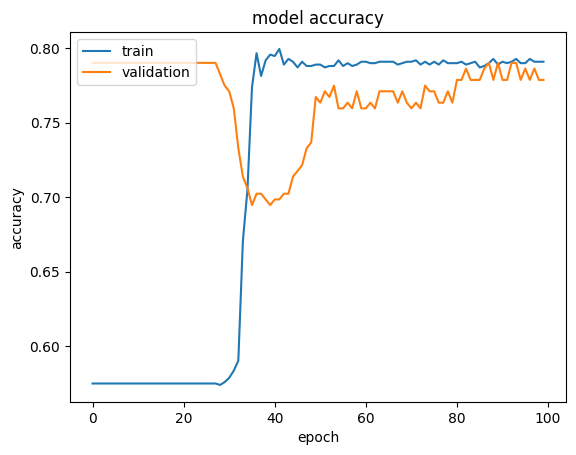

In [143]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [146]:
# calculate predictions

X_test['Survived_new'] = model.predict(X_test)
X_test['Survived_new'] = X_test['Survived_new'].apply(lambda x: round(x,0)).astype('int')


9/9 [==============================] - 0s 542us/step


In [147]:
y_test

1148    0
1049    1
982     0
808     0
1195    0
       ..
572     1
140     1
1182    1
312     0
199     1
Name: survived, Length: 262, dtype: int64

In [148]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_test, X_test['Survived_new']))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       144
           1       0.80      0.63      0.70       118

    accuracy                           0.76       262
   macro avg       0.77      0.75      0.75       262
weighted avg       0.77      0.76      0.76       262



In [150]:
#diff number of layers

In [159]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8)
X_train = titanic_df_trunc[pd.notnull(titanic_df_trunc['survived'])].drop(['survived'], axis=1)
y_train = titanic_df_trunc[pd.notnull(titanic_df_trunc['survived'])]['survived']

In [160]:
def create_model(lyrs=[6], act='sigmoid', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [161]:
model = create_model()
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 6)                 30        
                                                                 
 dropout_14 (Dropout)        (None, 6)                 0         
                                                                 
 dense_29 (Dense)            (None, 1)                 7         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 74.47%


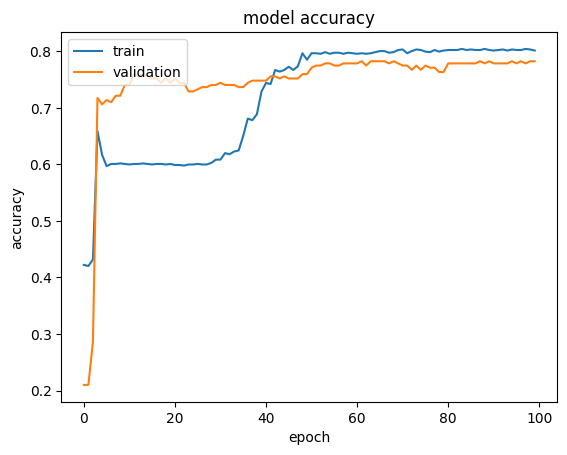

In [163]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [164]:
# calculate predictions
# calculate predictions
X_test['Survived_new'] = model.predict(X_test)
X_test['Survived_new'] = X_test['Survived_new'].apply(lambda x: round(x,0)).astype('int')


9/9 [==============================] - 0s 383us/step


In [166]:
print(classification_report(y_test, X_test['Survived_new']))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       144
           1       0.80      0.67      0.73       118

    accuracy                           0.77       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.77      0.77       262



### F-1 Score has slightly improved on increasing the number of hidden layers in the NN